# UTS PENAMBANGAN DATA

**Nama : Achmad Baharuddin Akbar**

**Nim  : 210411100001**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
transfusion = pd.read_csv("https://raw.githubusercontent.com/achmadbaharuddinakbar/pendata/DataFile/dataset.csv")
transfusion.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data Information

In [ ]:
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Variable Selection**

Pada tahapan ini, akan dilakukan pemilihan variabel baik untuk variabel independen maupun variabel dependen.

Variabel independen diberi nama x. Untuk mempermudah maka keluarkan variabel target dari data tersebut dengan fungsi ‘.drop’. Axis =1 yang berarti bahwa semua variabel kecuali variabel target merupakan variabel independen

In [ ]:
x = transfusion.drop(["target"], axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Selanjutnya pilih variabel dependen yang diberi nama y. Variabel dependen pada kasus ini adalah Target.

In [ ]:
y = transfusion["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

**Spliting Data Train dan Data Test**

Untuk melakukan pembagian data train dan test, pertama perlu mengimport fungsi untuk membagi data dari library scikit-learn. Scikit-Learn memberikan sejumlah fitur untuk keperluan data science.

Data Heart Disease Prediction akan dibagi menjadi 2 bagian yaitu x test dan x train untuk variabel independen, y test dan y train untuk variabel dependen.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

**Scaling Data**

Menyamakan skala data dengan menggunakan fungsi ‘StandarScaler’ dari package scikit-learn. Teknik Standard Scaler berguna ketika membandingkan data yang sesuai dengan unit yang berbeda. Standard Scaler mengubah data yang sedemikian rupa sehingga distribusinya memiliki nilai rata-rata 0 dan standar deviasi 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()  
scaler.fit(x_train)
x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

**Klasifikasi dengan KNN**

- Klasifikasi pertama akan menggunakan KNN, dengan mengimport fungsi KNeighborsClassifier dari package scikit-learn.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

- Mengaktifkan atau memanggil fungsi klasifikasi KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8)

- Memasukkan data training pada fungsi klasifikasi KNN

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8)

- Menentukan hasil prediksi dari x_test yang disebut dengan y prediksi

In [ ]:
y_pred = knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

- Menentukan probabilitas hasil prediksi

In [ ]:
knn.predict_proba(x_test)

array([[0.   , 1.   ],
       [0.875, 0.125],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.   , 1.   ],
       [1.   , 0.   ],
       [0.125, 0.875],
       [0.625, 0.375],
       [0.25 , 0.75 ],
       [0.25 , 0.75 ],
       [0.875, 0.125],
       [0.625, 0.375],
       [1.   , 0.   ],
       [1.   , 0.   ],
       [0.625, 0.375],
       [1.   , 0.   ],
       [0.625, 0.375],
       [0.625, 0.375],
       [0.625, 0.375],
       [0.125, 0.875],
       [0.25 , 0.75 ],
       [0.5  , 0.5  ],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.5  , 0.5  ],
       [0.5  , 0.5  ],
       [0.875, 0.125],
       [0.375, 0.625],
       [1.   , 0.   ],
       [0.5  , 0.5  ],
       [1.   , 0.   ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.75 , 0.25 ],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.125, 0.875],
       [0.375, 0.625],
       [0.   , 1.   ],
       [0.125, 0.875],
       [0.125, 0.875],
       [0.375, 0.625],
       [0.875, 0.125],
       [0. 

- Import fungsi confusion matrix dari package scikit-learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

- Menampilkan confusion matrix dari hasil prediksi dengan metode KNN

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[25  5]
 [ 7 24]]


- Menampilkan laporan klasifikasi yang berisi beberapa nilai dengan menggunakan fungsi ‘classification_report’ yang diimport dari package scikit-learn.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.83      0.77      0.80        31

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



- Mengetahui nilai akurasi dengan model yang ada maka lakukan perhitungan berikut : (True Positive / True Negative )/ n berdasarkan nilai yang ada pada confusion matrix

In [ ]:
#accuracy = tp+tn/total
accuracy = (25+24)/61
accuracy

0.8032786885245902

**Klasifikasi dengan Metode Naive Bayes**

- Klasifikasi selanjutnya menggunakan metode Naive Bayes dengan mengimport fungsi GaussianNB dari package scikit-learn.

In [ ]:
from sklearn.naive_bayes import GaussianNB

- Mengaktifkan atau memanggil fungsi klasifikasi Naive Bayes

In [ ]:
modelnb = GaussianNB()

- Memasukkan data training pada fungsi klasifikasi Naive Bayes

In [ ]:
nbtrain = modelnb.fit(x_train, y_train)

- Selanjutnya menghitung jumlah pada class-class dari model nbtrain

In [ ]:
nbtrain.class_count_

array([108., 134.])

- Menentukan hasil prediksi dari x_test yang disebut dengan y prediksi

In [ ]:
y_pred = nbtrain.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

- Menentukan probabilitas hasil prediksi

In [ ]:
nbtrain.predict_proba(x_test)

array([[5.82519301e-04, 9.99417481e-01],
       [9.99240660e-01, 7.59340083e-04],
       [9.99938876e-01, 6.11239119e-05],
       [9.99992659e-01, 7.34091227e-06],
       [3.63340453e-03, 9.96366595e-01],
       [9.99951075e-01, 4.89245485e-05],
       [8.58705904e-03, 9.91412941e-01],
       [5.98824205e-01, 4.01175795e-01],
       [5.96179179e-04, 9.99403821e-01],
       [9.33512783e-01, 6.64872171e-02],
       [9.97942511e-01, 2.05748946e-03],
       [4.57119010e-01, 5.42880990e-01],
       [9.99999986e-01, 1.36201854e-08],
       [9.99995731e-01, 4.26929475e-06],
       [5.16997591e-01, 4.83002409e-01],
       [1.00000000e+00, 5.08299544e-11],
       [9.10170340e-01, 8.98296597e-02],
       [9.86810593e-01, 1.31894074e-02],
       [5.72080552e-01, 4.27919448e-01],
       [2.24337668e-01, 7.75662332e-01],
       [1.35284858e-01, 8.64715142e-01],
       [9.99163391e-01, 8.36609347e-04],
       [4.11790193e-05, 9.99958821e-01],
       [9.82142823e-01, 1.78571775e-02],
       [9.874890

- Import fungsi confusion matrix dari package scikit-learn

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

- Menampilkan confusion matrix dari hasil prediksi dengan metode Naive Bayes

In [ ]:
confusion_matrix(y_test, y_pred)

array([[27,  3],
       [ 7, 24]])

- Menampilkan laporan klasifikasi yang berisi beberapa nilai dengan menggunakan fungsi ‘classification_report’ yang diimport dari package scikit-learn.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.89      0.77      0.83        31

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



- Mengetahui nilai akurasi dengan model yang ada maka lakukan perhitungan berikut : (True Positive / True Negative )/ n berdasarkan nilai yang ada pada confusion matrix

In [ ]:
#accuracy = tp+tn/total
accuracy = (27+24)/61
accuracy

0.8360655737704918

**Kesimpulan**

**Klasifikasi dengan Metode KNN**

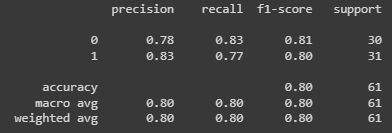

image.png

Dengan menggunakan metode KNN diperoleh nilai akurasi sebesar 0.803 atau 80.3% dengan nilai rata-rata precisision untuk klasifikasi 0 dan 1 sebesar 0.80, recall sebesar 0.80, f1-score sebesar 0.80 dengan total support masing-masing 30 untuk klasifikasi 0 (tidak melakukan transfusi) dan 31 untuk klasifikasi 1 (melakukan transfusi) sehingga diperoleh total sebanyak 61

**Klasifikasi dengan Metode Naive Bayes**

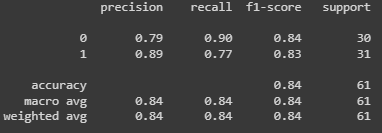

image.png

Dengan menggunakan metode Naive Bayes diperoleh nilai akurasi sebesar 0.836 atau 83.6% dengan nilai rata-rata precisision untuk klasifikasi 0 dan 1 sebesar 0.84, recall sebesar 0.84, f1-score sebesar 0.84 dengan total support masing-masing 30 untuk klasifikasi 0 (tidak melakukan transfusi) dan 31 untuk klasifikasi 1 (melakukan transfusi) sehingga diperoleh total sebanyak 61